In [1]:
import numpy as np
from sklearn.manifold import TSNE
import torch
from transformers import BertConfig, BertModel, BertTokenizer
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from umap import UMAP

/home/customer/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [68]:
pip show numpy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /home/customer/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: astropy, bert-serving-client, bokeh, Bottleneck, contourpy, daal4py, datasets, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyarrow, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile, transformers, umap-learn, xarray
Note: you may need to

In [4]:
config = BertConfig.from_json_file("config.json")
model = BertForMaskedLM.from_pretrained('/home/customer/hyr/matbert-base-cased-copy-version/matbert-base-cased')
tokenizer = BertTokenizerFast.from_pretrained('/home/customer/hyr/matbert-base-cased-copy-version/matbert-base-cased', do_lower_case=False)
# unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

In [9]:
# # 提取所有词向量
# all_word_embeddings = []
# for word in tokenizer.vocab.keys():
#     if word.isalnum():  # 只选择字母数字组合的词，排除特殊标记
#         token_id = tokenizer.encode(word, add_special_tokens=False)
#         if len(token_id) == 1:  # 确保词没有分词成多个子词
#             token_id = torch.tensor(token_id).unsqueeze(0)
#             embeddings = model.bert.embeddings.word_embeddings(token_id)
#             all_word_embeddings.append(embeddings.squeeze().detach().numpy())

# all_word_embeddings = np.array(all_word_embeddings)

In [14]:

# from umap import UMAP
# # 使用UMAP进行降维
# reducer = UMAP()
# embeddings_umap = reducer.fit_transform(all_word_embeddings)


In [27]:
# # 可视化降维后的词向量
# plt.figure(figsize=(10, 8))
# plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=10)
# plt.title('UMAP Visualization of BERT Word Embeddings')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

In [ ]:
# ----------------------------------------------------------

In [5]:
# 提取所有词向量
all_word_embeddings = []
all_words = []
for word in tokenizer.vocab.keys():
    if word.isalnum():  # 只选择字母数字组合的词，排除特殊标记
        token_id = tokenizer.encode(word, add_special_tokens=False)
        if len(token_id) == 1:  # 确保词没有分词成多个子词
            token_id = torch.tensor(token_id).unsqueeze(0)
            embeddings = model.bert.embeddings.word_embeddings(token_id)
            all_word_embeddings.append(embeddings.squeeze().detach().numpy())
            all_words.append(word)

all_word_embeddings = np.array(all_word_embeddings)




In [6]:
from umap import UMAP
# 使用UMAP进行降维
reducer = UMAP()
embeddings_umap = reducer.fit_transform(all_word_embeddings)


In [8]:
# # 可视化降维后的词向量
# plt.figure(figsize=(10, 8))
# for i in range(len(all_words)):
#     plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='gray', s=20)

# # 标记高亮词汇
# for word in highlighted_words:
#     if word in all_words:
#         idx = all_words.index(word)
#         plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='blue', s=20)
#         plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='blue')

# plt.title('UMAP Visualization of BERT Word Embeddings')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.savefig('figure1.png')
# plt.show()


In [10]:
# highlighted_words = ['perovskite','mapbi3','lamno3','batio3']
# # 可视化降维后的词向量
# plt.figure(figsize=(10, 8))
# for i in range(len(all_words)):
#     plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='gray', s=20)

# # 标记高亮词汇
# for word in highlighted_words:
#     if word in all_words:
#         idx = all_words.index(word)
#         plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='blue', s=20)
#         plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='blue')

# plt.title('UMAP Visualization of BERT Word Embeddings')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.savefig('figure2.png')
# plt.show()


In [100]:
from sklearn.metrics.pairwise import cosine_similarity
# 计算所有词向量与"perovskite"的余弦相似度
word5_token = tokenizer.encode("emissivity", add_special_tokens=False)
word5_embedding = model.bert.embeddings.word_embeddings(torch.tensor(word5_token)).squeeze().detach().numpy()
cos_similarities1 = cosine_similarity(all_word_embeddings, [word5_embedding])


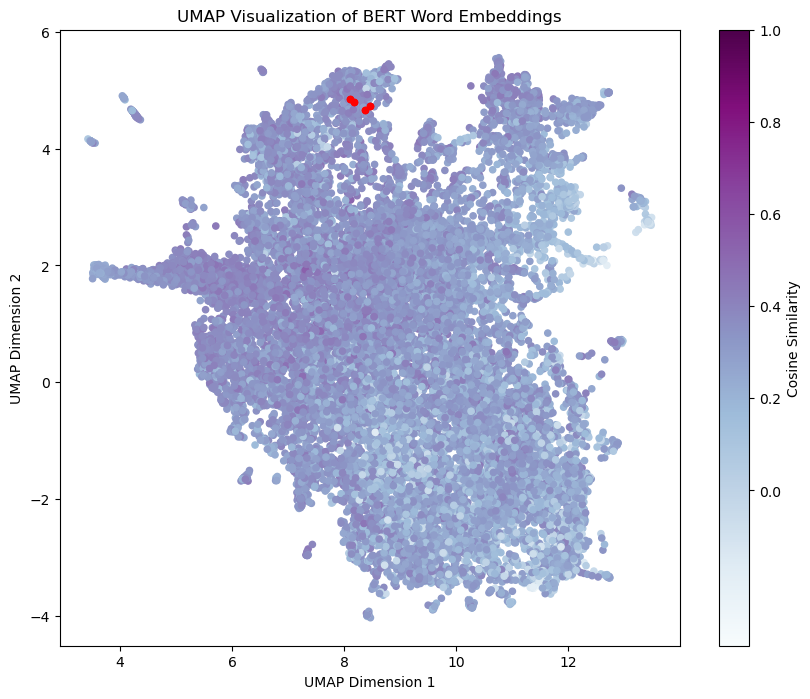

In [112]:
# 可视化降维后的词向量，并根据余弦相似度调整颜色深浅
plt.figure(figsize=(10, 8))
cmap = plt.cm.BuPu
scatter=plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cos_similarities1.squeeze(), cmap=cmap, s=20)

# 标记高亮词汇
highlighted_words = ['Al2O3','Y2O3','AlN','YAG']
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='red', marker='o', s=20)
        # plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='red')

highlighted_words = ['Al2O3','Y2O3','AlN','YAG']
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='red', marker='o', s=20)
        # plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='red')
       
    

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])


plt.savefig("figure3_word_embeddings_visualization.png")
plt.show()

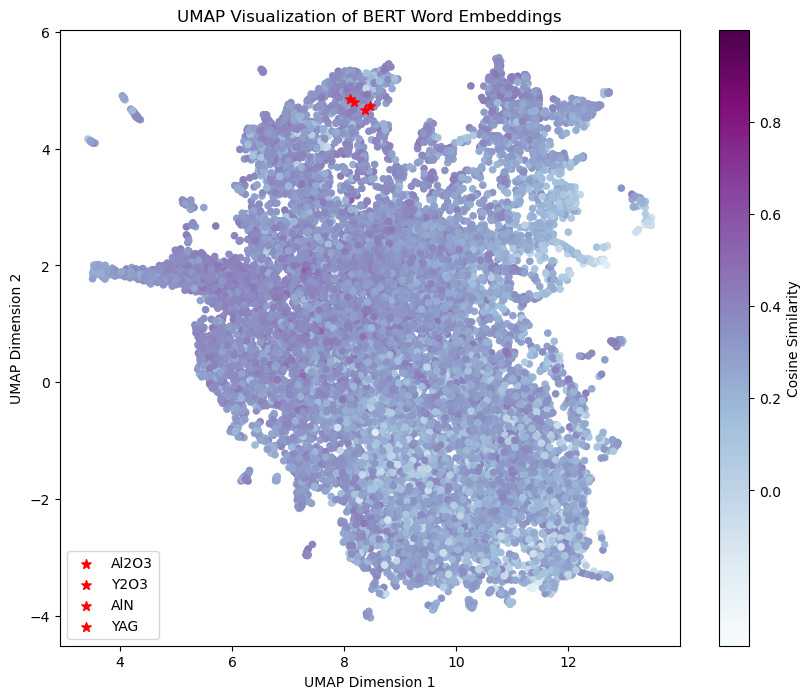

In [133]:
import numpy as np
import matplotlib.pyplot as plt
# 'Al2O3','Y2O3','AlN','YAG
# Nb2O5   Mn3O4  Co3O4


word1_index = all_words.index("Al2O3")
word2_index = all_words.index("Y2O3")
word3_index = all_words.index("AlN")
word4_index = all_words.index("YAG")
# word5_index = all_words.index("Nb2O5")
# word6_index = all_words.index("Mn3O4")
# word7_index = all_words.index("Co3O4")


cmap = plt.cm.BuPu
plt.figure(figsize=(10, 8))

# 根据余弦相似性调整颜色深浅并绘制散点图

colors = cmap(cos_similarities1.ravel())
# scatter = plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=colors, alpha=0.5)
scatter=plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cos_similarities1.squeeze(), cmap=cmap, s=20)

plt.scatter(embeddings_umap[word1_index, 0], embeddings_umap[word1_index, 1], c='red', marker='*', s=50, label='Al2O3')
plt.scatter(embeddings_umap[word2_index, 0], embeddings_umap[word2_index, 1], c='red', marker='*', s=50, label='Y2O3')
plt.scatter(embeddings_umap[word3_index, 0], embeddings_umap[word3_index, 1], c='red', marker='*', s=50, label='AlN')
plt.scatter(embeddings_umap[word4_index, 0], embeddings_umap[word4_index, 1], c='red', marker='*', s=50, label='YAG')
# plt.scatter(embeddings_umap[word5_index, 0], embeddings_umap[word5_index, 1], c='red', marker='*', s=50, label='Nb2O5')
# plt.scatter(embeddings_umap[word6_index, 0], embeddings_umap[word6_index, 1], c='red', marker='*', s=50, label='Mn3O4')
# plt.scatter(embeddings_umap[word7_index, 0], embeddings_umap[word7_index, 1], c='red', marker='*', s=50, label='Co3O4')


plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# 添加颜色条
cbar = plt.colorbar(scatter, ticks=np.linspace(colors.min(), colors.max(), 6))
cbar.set_label('Cosine Similarity')

plt.legend()
plt.savefig("figure3_word_embeddings_visualization.png")
plt.show()


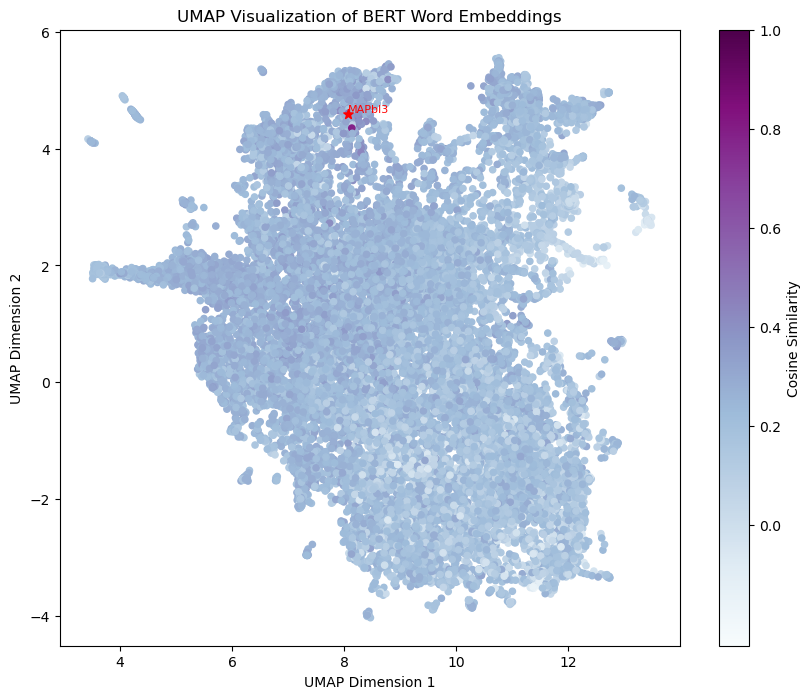

In [24]:
# 可视化降维后的词向量，并根据余弦相似度调整颜色深浅
plt.figure(figsize=(10, 8))

# plt.cm.Blues: 蓝色调色板
# plt.cm.Greens: 绿色调色板
# plt.cm.Reds: 红色调色板
# plt.cm.Oranges: 橙色调色板
# plt.cm.Purples: 紫色调色板
# plt.cm.Greys: 灰色调色板
# plt.cm.YlOrBr: 黄橙棕色调色板
# plt.cm.YlOrRd: 黄橙红色调色板
# marker='o',marker='s'marker='^'、marker='v'、marker='<'、marker='>' marker='+'marker='x'
cmap = plt.cm.BuPu
scatter=plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cos_similarities1.squeeze(), cmap=cmap, s=20)

# 标记高亮词汇
highlighted_words = ["MAPbI3"]
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='red', marker='*',s=50)
        plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='red')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig("figure4_word_embeddings_visualization.png")
plt.show()

In [16]:
 # 目标词汇1
word3_token = tokenizer.encode("perovskite", add_special_tokens=False)
word3_embedding = model.bert.embeddings.word_embeddings(torch.tensor(word3_token)).squeeze().detach().numpy()
cos_word3 = cosine_similarity(all_word_embeddings, [word3_embedding])
 # 目标词汇2
word4_token = tokenizer.encode("stable", add_special_tokens=False)
word4_embedding = model.bert.embeddings.word_embeddings(torch.tensor(word4_token)).squeeze().detach().numpy()
cos_word4 = cosine_similarity(all_word_embeddings, [word4_embedding])

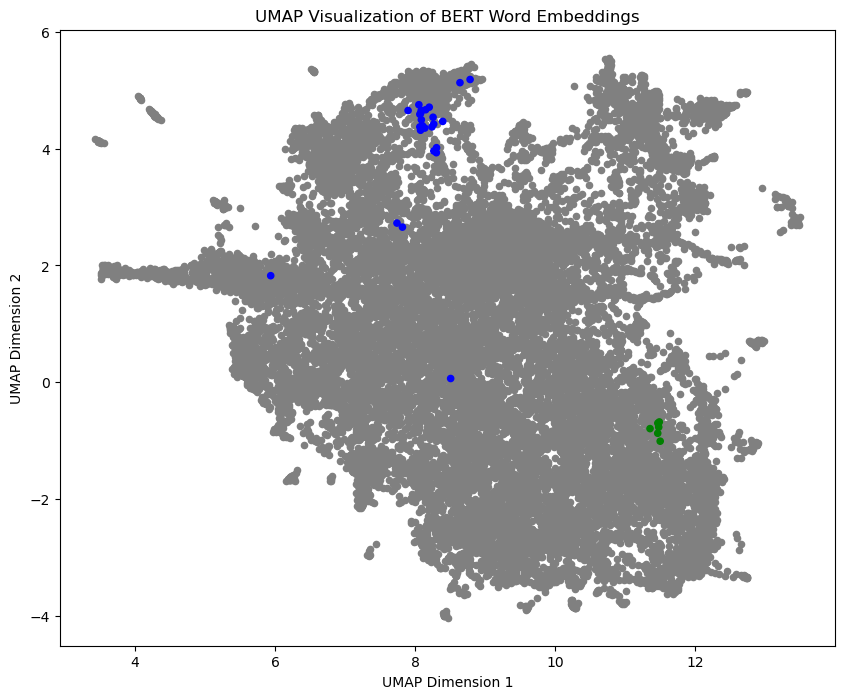

In [21]:
plt.figure(figsize=(10, 8))
# 先绘制灰色的点
gray_indices = [i for i in range(len(all_words)) if cos_word3[i] <= 0.4 and cos_word4[i] <= 0.4]
gray_embeddings_umap = embeddings_umap[gray_indices]
plt.scatter(gray_embeddings_umap[:, 0], gray_embeddings_umap[:, 1], color='gray', s=20)

# 再绘制高亮的点
highlighted_indices = [i for i in range(len(all_words)) if i not in gray_indices]
highlighted_embeddings_umap = embeddings_umap[highlighted_indices]
highlighted_colors = ['blue' if cos_word3[i] > 0.4 else 'green' for i in highlighted_indices]
plt.scatter(highlighted_embeddings_umap[:, 0], highlighted_embeddings_umap[:, 1], c=highlighted_colors, s=20)

# # 标记高亮词汇
# highlighted_words = ["perovskite", "lamno3", "stable"]
# highlighted_colors = ['blue', 'red', 'green']
# for word, color in zip(highlighted_words, highlighted_colors):
#     if word in all_words:
#         idx = all_words.index(word)
#         plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color=color, s=20)
#         plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color=color)

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig("figure5_word_embeddings_visualization.png")
plt.show()


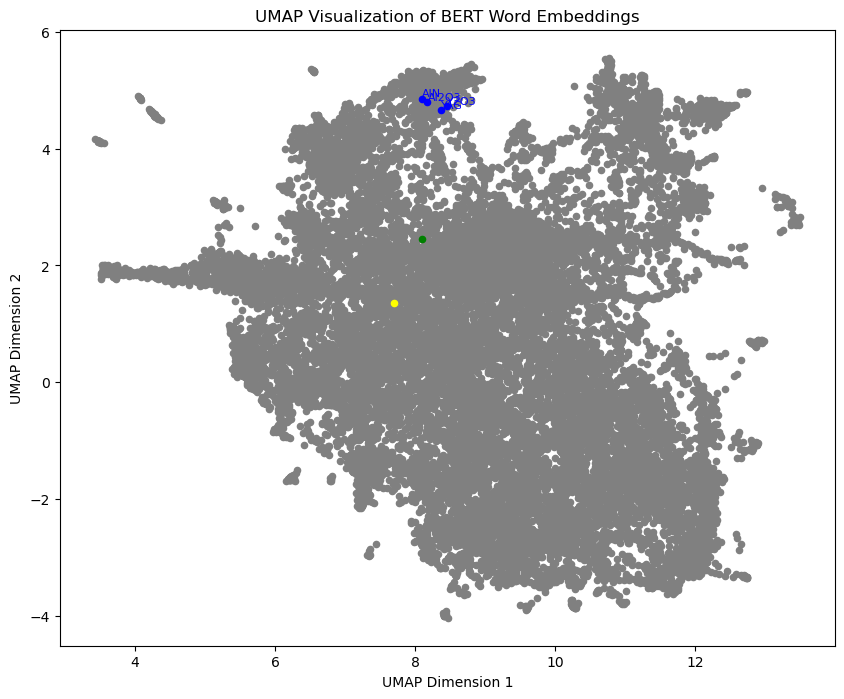

In [99]:
plt.figure(figsize=(10, 8))

# 先绘制灰色的点
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], color='gray', s=20)

# 高亮的词语及其对应的位置
highlighted_words_blue = ['Al2O3','Y2O3','AlN','YAG']  #典型钙钛矿
highlighted_words_green = ['phonon']  #典型HTL材料
highlighted_words_yellow = ['emissivity']  #锂电池正极材料
''
for word in highlighted_words_blue:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='blue', s=20)
        plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='blue')
        
for word in highlighted_words_green:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='green', s=20)
        # plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='green')
        
for word in highlighted_words_yellow:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='yellow', s=20)
        # plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='yellow')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig("word_embeddings_visualization.png")
plt.show()


In [98]:
# 定义要比较的词
target_word1 = "emissivity"
# 计算目标词与所有其他词的余弦相似度
target_token_id = tokenizer.encode(target_word1, add_special_tokens=False)
target_embedding = model.bert.embeddings.word_embeddings(torch.tensor(target_token_id)).squeeze().detach().numpy()
cos_similarities2 = cosine_similarity(all_word_embeddings, [target_embedding])
# 对相似度进行排序并获取排序后的索引
sorted_indices = np.argsort(cos_similarities2.flatten())[::-1]

# 打印排名和相似度
print("cosine similarity for '{}':".format(target_word1))
for rank, idx in enumerate(sorted_indices):
    word = all_words[idx]
    similarity = cos_similarities2[idx][0]
    print("{}: {} (Cosine Similarity: {:.4f})".format(rank + 1, word, similarity))


cosine similarity for 'emissivity':
1: emissivity (Cosine Similarity: 1.0000)
2: emis (Cosine Similarity: 0.6533)
3: emittance (Cosine Similarity: 0.6118)
4: absorptivity (Cosine Similarity: 0.6055)
5: reflectivity (Cosine Similarity: 0.5598)
6: emissive (Cosine Similarity: 0.5445)
7: NDVI (Cosine Similarity: 0.5411)
8: albedo (Cosine Similarity: 0.5388)
9: emits (Cosine Similarity: 0.5283)
10: thermophysical (Cosine Similarity: 0.5274)
11: radiance (Cosine Similarity: 0.5255)
12: permittivity (Cosine Similarity: 0.5204)
13: Emission (Cosine Similarity: 0.5169)
14: photoactivity (Cosine Similarity: 0.5054)
15: AOD (Cosine Similarity: 0.5021)
16: reflectance (Cosine Similarity: 0.5005)
17: IPCE (Cosine Similarity: 0.5000)
18: thermocouples (Cosine Similarity: 0.4997)
19: Photoluminescence (Cosine Similarity: 0.4997)
20: spectrally (Cosine Similarity: 0.4969)
21: insolation (Cosine Similarity: 0.4957)
22: EQE (Cosine Similarity: 0.4953)
23: thermograms (Cosine Similarity: 0.4948)
24: ele